In [2]:
# 1. Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 2. Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# 3. Data Pre-Processing & Feature Selection
print("Missing values in train_X:", np.isnan(train_X).sum())
print("Missing values in test_X:", np.isnan(test_X).sum())

Missing values in train_X: 0
Missing values in test_X: 0


In [5]:
# Reshape data to fit the model (CNN expects 4D input)
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

In [6]:
# Normalize pixel values
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

In [7]:
# One-hot encode labels
train_y_cat = to_categorical(train_y, 10)
test_y_cat = to_categorical(test_y, 10)

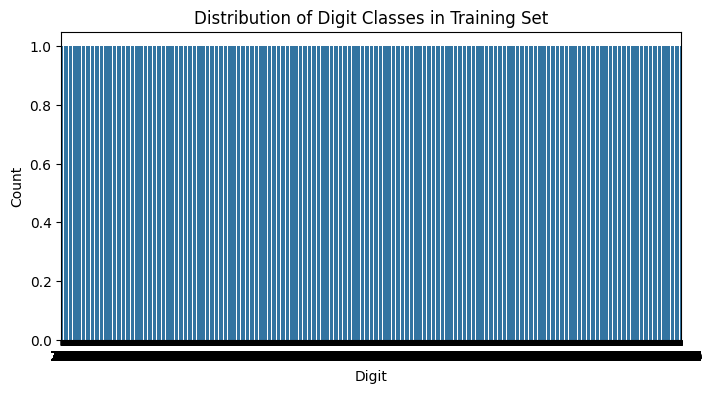

In [8]:
# 4. Data Visualization
# Bar Chart: Distribution of digit classes
plt.figure(figsize=(8,4))
sns.countplot(train_y)
plt.title("Distribution of Digit Classes in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


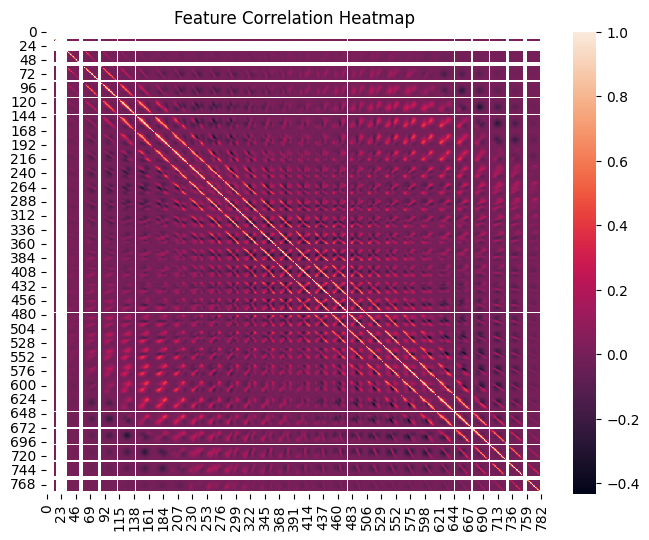

In [9]:
# Heat Map: Correlation matrix (not typical for image data, but shown for completeness)
corr_matrix = np.corrcoef(train_X.reshape(train_X.shape[0], -1).T)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix)
plt.title("Feature Correlation Heatmap")
plt.show()

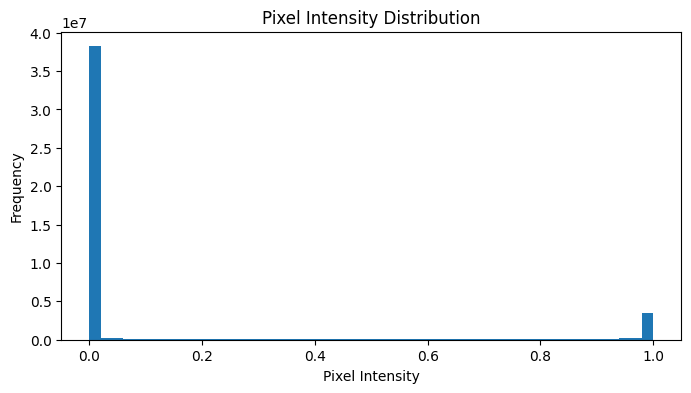

In [10]:
# Histogram: Pixel intensity distribution
plt.figure(figsize=(8,4))
plt.hist(train_X.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

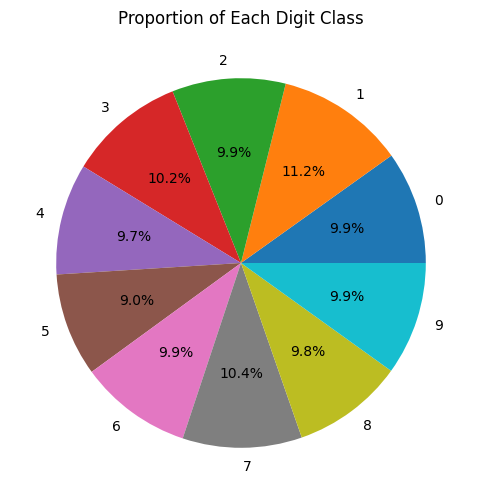

In [11]:
# Pie Chart: Proportion of each digit class
plt.figure(figsize=(6,6))
plt.pie(np.bincount(train_y), labels=np.arange(10), autopct='%1.1f%%')
plt.title("Proportion of Each Digit Class")
plt.show()

In [12]:
# 5. Splitting and Training the data
# 80% Training, 20% Testing (already split in MNIST, but let's ensure)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y_cat, test_size=0.2, random_state=42)

In [13]:
# 6. Load the model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 7. Fit the training data into the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7359 - loss: 0.8123 - val_accuracy: 0.9728 - val_loss: 0.0937
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9580 - loss: 0.1399 - val_accuracy: 0.9812 - val_loss: 0.0614
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9684 - loss: 0.1017 - val_accuracy: 0.9862 - val_loss: 0.0481
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9726 - loss: 0.0908 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9775 - loss: 0.0731 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9796 - loss: 0.0664 - val_accuracy: 0.9901 - val_loss: 0.0366
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9816 - loss: 0.0619 - val_accuracy: 0.9900 - val_loss: 0.0331
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0558 - val_accuracy: 0.

In [16]:
# 8. Evaluating the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

if val_accuracy < 0.75:
    print("Accuracy below 75%. Consider changing the algorithm or tuning hyperparameters.")
else:
    print("Accuracy satisfactory. Proceeding to build predictive model.")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0319
Validation Accuracy: 98.96%
Accuracy satisfactory. Proceeding to build predictive model.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9878 - loss: 0.0365
Test Accuracy: 99.06%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



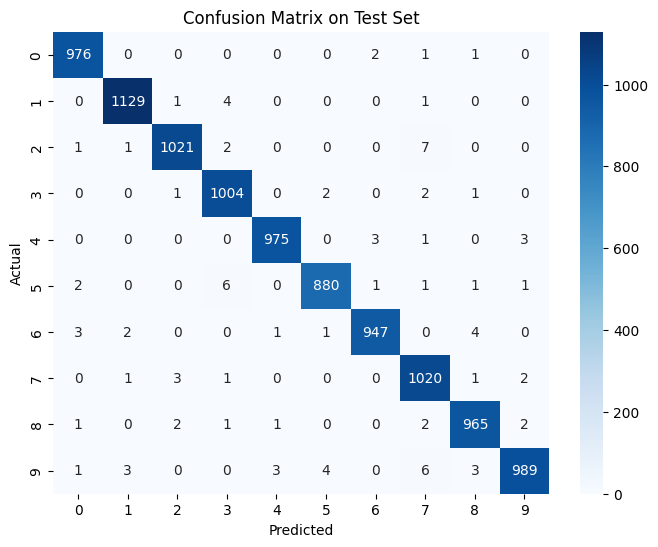

In [17]:
# 9. Build the Predictive Model (Test Set Evaluation)
test_loss, test_accuracy = model.evaluate(test_X, test_y_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Classification report and confusion matrix
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(test_y, y_pred_classes))

conf_mat = confusion_matrix(test_y, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# 10. Deploy the model (Saving for future use)
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5
